In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
results_path = 'Results_505.xlsx'
results_df = pd.read_excel(results_path, dtype = str)

In [39]:
results_df = results_df.rename(columns={
    'Hora de inicio': 'start_date',
    'Hora de finalización': 'end_date',
    'Selecciona la asignatura':'subject',
    'Selecciona la pregunta': 'question',
    'Conversación con ChatGPT': 'conversation_ChatGPT',
    '¿Cuántas preguntas has realizado a ChatGPT para obtener la mejor respuesta?': 'numTries_ChatGPT',
    'Conversación con Gemini': 'conversation_Gemini',
    '¿Cuántas preguntas has realizado a Gemini para obtener la mejor respuesta?': 'numTries_Gemini',
    'Conversación con Copilot': 'conversation_Copilot',
    '¿Cuántas preguntas has realizado a Copilot para obtener la mejor respuesta?': 'numTries_Copilot',
    '¿Te ha ayudado ChatGPT a responder a la pregunta?': 'rating_ChatGPT',
    '¿Te ha ayudado Gemini a responder a la pregunta?': 'rating_Gemini',
    '¿Te ha ayudado Copilot a responder a la pregunta?': 'rating_Copilot',
    'Indica tu respuesta a la pregunta':'final_answer'
}).drop(columns=results_df.columns, errors='ignore')

results_df['start_date'] = pd.to_datetime(results_df['start_date'])
results_df['end_date'] = pd.to_datetime(results_df['end_date'])

In [42]:
results_df = results_df[
    (results_df['subject']=="Desarrollo de Aplicaciones Distribuidas") &
    (results_df['start_date']>= '2024/04/23 13:00:00')
]

In [43]:
results_df['numTries_ChatGPT'] = results_df['numTries_ChatGPT'].astype(int)
results_df['numTries_Gemini'] = results_df['numTries_Gemini'].astype(int)
results_df['numTries_Copilot'] = results_df['numTries_Copilot'].astype(int)

In [44]:
response_map = {
 'Si. Me ha dado la mejor respuesta' : 'Mejor respuesta',
 'Si. Me ha dado una respuesta correcta, pero menos completa que otras IAs': 'Correcta, pero no tan completa',
 'No. Me ha contestado correctamente, pero no responde a la pregunta que le he hecho': 'No responde a la pregunta',
 'No. Me ha contestado de forma errónea': 'Responde incorrectamente'
}
results_df['rating_ChatGPT_reduced'] = results_df['rating_ChatGPT'].apply(lambda rating: response_map[rating])
results_df['rating_Gemini_reduced'] = results_df['rating_Gemini'].apply(lambda rating: response_map[rating])
results_df['rating_Copilot_reduced'] = results_df['rating_Copilot'].apply(lambda rating: response_map[rating])

In [45]:
results_df.head()

,start_date,end_date,subject,question,conversation_ChatGPT,numTries_ChatGPT,conversation_Gemini,numTries_Gemini,conversation_Copilot,numTries_Copilot,rating_ChatGPT,rating_Copilot,rating_Gemini,rating_ChatGPT_reduced,rating_Gemini_reduced,rating_Copilot_reduced
425,2024-04-23 13:15:08,2024-04-23 13:20:11,Desarrollo de Aplicaciones Distribuidas,Pregunta 1,Pregunta 1 (Pregunta de teoría con respuesta d...,1,Pregunta 1 (Pregunta de teoría con respuesta d...,1,Pregunta 1 (Pregunta de teoría con respuesta d...,1,Si. Me ha dado la mejor respuesta,Si. Me ha dado la mejor respuesta,Si. Me ha dado la mejor respuesta,Mejor respuesta,Mejor respuesta,Mejor respuesta
426,2024-04-23 13:18:22,2024-04-23 13:24:41,Desarrollo de Aplicaciones Distribuidas,Pregunta 1,Existen varias formas de lograr la escalabilid...,1,\nExisten dos enfoques principales para lograr...,2,Existen principalmente dos formas de lograr la...,1,"Si. Me ha dado una respuesta correcta, pero me...","Si. Me ha dado una respuesta correcta, pero me...",Si. Me ha dado la mejor respuesta,"Correcta, pero no tan completa",Mejor respuesta,"Correcta, pero no tan completa"
427,2024-04-23 13:20:56,2024-04-23 13:25:28,Desarrollo de Aplicaciones Distribuidas,Pregunta 2,Pregunta 2 (Pregunta de teoría con respuesta d...,1,Pregunta 2 (Pregunta de teoría con respuesta d...,1,Pregunta 2 (Pregunta de teoría con respuesta d...,2,Si. Me ha dado la mejor respuesta,Si. Me ha dado la mejor respuesta,"Si. Me ha dado una respuesta correcta, pero me...",Mejor respuesta,"Correcta, pero no tan completa",Mejor respuesta
428,2024-04-23 13:24:48,2024-04-23 13:27:36,Desarrollo de Aplicaciones Distribuidas,Pregunta 2,La mejor opción sería utilizar un sistema de m...,2,La mejor tecnología de comunicación para comun...,1,La mejor opción para este escenario sería util...,1,Si. Me ha dado la mejor respuesta,"Si. Me ha dado una respuesta correcta, pero me...","Si. Me ha dado una respuesta correcta, pero me...",Mejor respuesta,"Correcta, pero no tan completa","Correcta, pero no tan completa"
429,2024-04-23 13:27:44,2024-04-23 13:32:51,Desarrollo de Aplicaciones Distribuidas,Pregunta 3,Hay un error en la clase EoloParkRestControlle...,1,Errores potenciales en el código Spring Boot p...,1,Aquí hay algunos problemas que veo en el códig...,1,Si. Me ha dado la mejor respuesta,"Si. Me ha dado una respuesta correcta, pero me...","Si. Me ha dado una respuesta correcta, pero me...",Mejor respuesta,"Correcta, pero no tan completa","Correcta, pero no tan completa"


In [46]:
def numTries_perQuestion(question):
    df = results_df
    if question != 'All':
        df = results_df[results_df['question']==question]
    results = [
        question,
        df['numTries_ChatGPT'].mean(),
        df[df['numTries_Gemini']>0]['numTries_Gemini'].mean(),
        #df['numTries_Gemini'].mean(),
        df['numTries_Copilot'].mean()
    ]
    return results

In [47]:
len(results_df[results_df['numTries_Gemini']==0])

6

In [48]:
rows = [numTries_perQuestion("All")] + [numTries_perQuestion("Pregunta "+str(i)) for i in range(1,7)]
pd.DataFrame(rows,columns=['Question','ChatGPT','Gemini','Copilot']).round(decimals=3)

,Question,ChatGPT,Gemini,Copilot
0,All,1.152,1.222,1.182
1,Pregunta 1,1.167,1.400,1.167
2,Pregunta 2,1.200,1.000,1.400
3,Pregunta 3,1.200,1.000,1.200
4,Pregunta 4,1.000,1.200,1.167
5,Pregunta 5,1.000,1.250,1.200
6,Pregunta 6,1.333,1.400,1.000


In [49]:
colors = {
    'Mejor respuesta':  'gold',
    'Correcta, pero no tan completa': 'silver', 
    'No responde a la pregunta': 'salmon', 
    'Responde incorrectamente': 'orangered'
}

def ia_rating_pieChart(ia, question, ax):
    df = results_df[results_df['question']==question].groupby(['rating_'+ia+'_reduced']).count()
    df.plot.pie(
        y='question', ylabel='', autopct='%1.1f%%', #labeldistance=None,
        title="¿Te ha ayudado %s a responder a la %s?"%(ia, question),
        ax=ax, legend=False, colors=[colors[name] for name in df.index]
    )
    #.legend(bbox_to_anchor=(1,1), loc="lower right", bbox_transform=plt.gcf().transFigure)

# Cuánto ha ayudado cada IA en cada pregunta

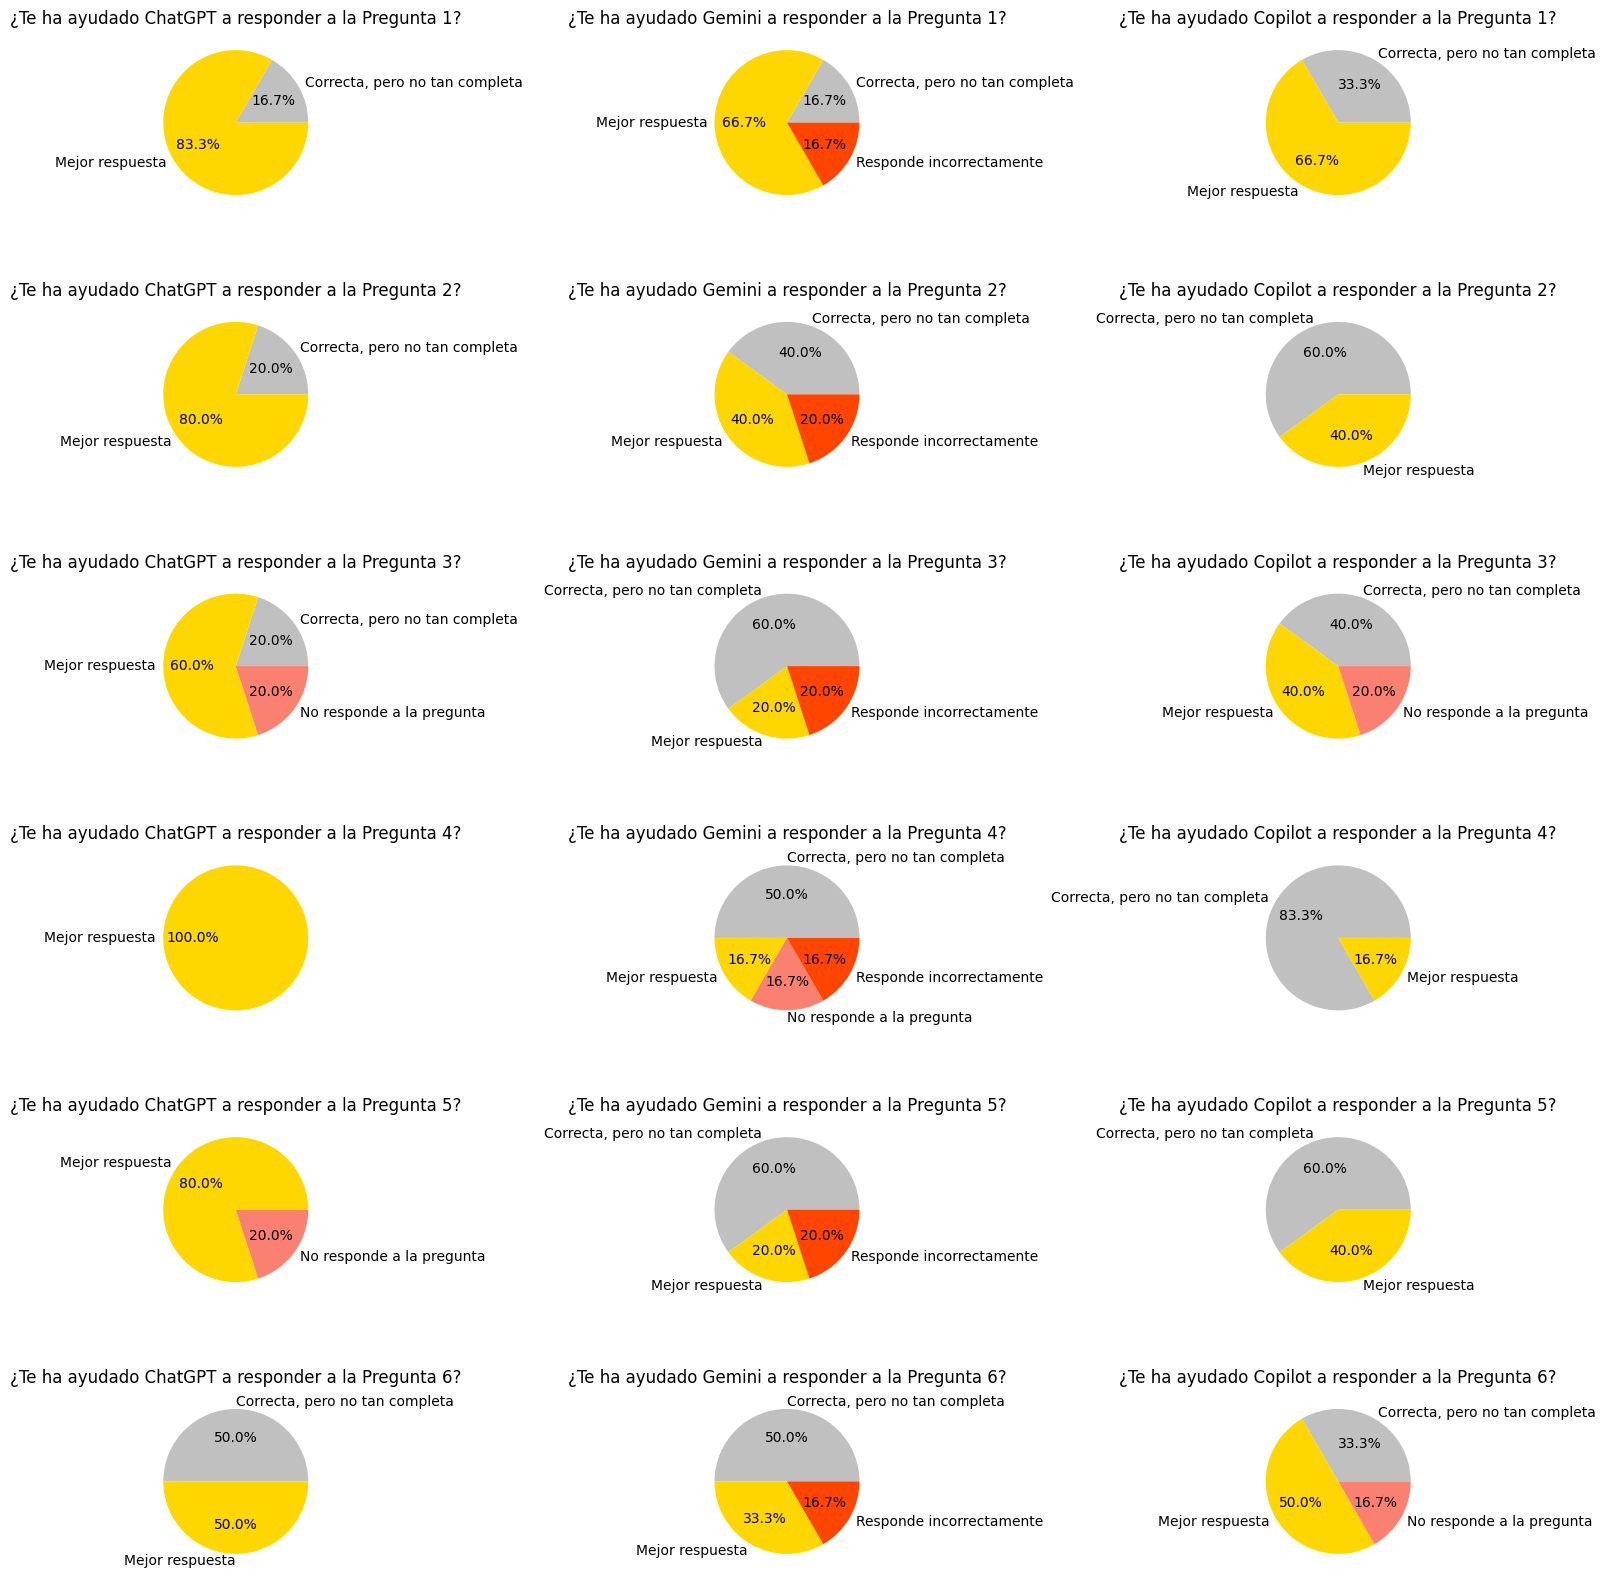

In [50]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(21,20))
fig.subplots_adjust(hspace=0.5, wspace=0.05)

row,col = 0,0
for question in range(1,7):
    for ia in ['ChatGPT','Gemini','Copilot']:
        ia_rating_pieChart(ia, 'Pregunta '+str(question), axes[row,col])
        if col == 2:
            col = 0
            row = row + 1
        else:
            col+=1